In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.utils import  to_categorical
import tensorflow as tf
from matplotlib import pyplot as plt
import os
import numpy as np
np.random.seed(123)
%matplotlib inline

### داده افزایی

داده افزایی باید منطقی باشد. یعنی ما انتظار داریم که بعد از اعمال یک تبدیل بر روی تصویر یک گل باز هم آن را به عنوان یک گل دسته بندی کنیم.

In [14]:
path = '../data/flowers'

Found 4323 images belonging to 5 classes.


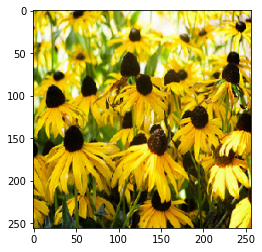

In [64]:
generator = tf.keras.preprocessing.image.ImageDataGenerator()
x_org,y_org = next(generator.flow_from_directory(path,batch_size = 8,seed =123))
plt.imshow(x_org[7].astype('uint8'))

### flip کردن تصویر

Found 4323 images belonging to 5 classes.


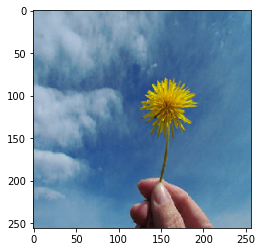

In [48]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
x,y = next(generator.flow_from_directory(path,batch_size = 8,seed =42))
plt.imshow(x[7].astype('uint8'))

Found 4323 images belonging to 5 classes.


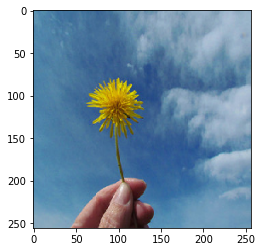

In [50]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,)
x,y = next(generator.flow_from_directory(path,batch_size = 8,seed =42))
plt.imshow(x[7].astype('uint8'))

#### چرخش تصویر

Found 4323 images belonging to 5 classes.


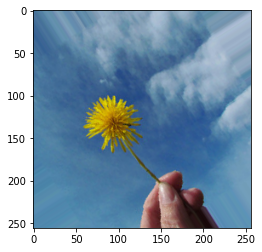

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range= 60)
x,y = next(generator.flow_from_directory(path,batch_size = 8,seed =42))
plt.imshow(x[7].astype('uint8'))

#### تغییر روشنی یا تاریکی عکس

یعنی روشنی عکس می تواند حداکثر نصف یا دوبرابر شودیا مقادیری بین این دو را در بر بگیرد.

Found 4323 images belonging to 5 classes.


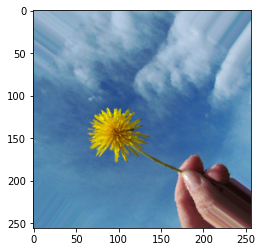

In [35]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 60,
    brightness_range = (0.5,2),
)
x,y = next(generator.flow_from_directory(path,batch_size = 8,seed =42))
plt.imshow(x[7].astype('uint8'))

#### شیفت دادن پیکسل های تصویر


Width of images could be shifted by any of the values in the specified range. That is, any value randomly chosen from -40 pixels to +40 pixels will be applied.


Found 4323 images belonging to 5 classes.


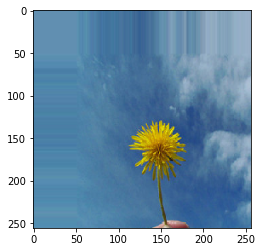

In [32]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-50,-25,0,25,50],
    height_shift_range= [-50,0,50]
)
x,y = next(generator.flow_from_directory(path,batch_size = 8,seed =42))
plt.imshow(x[7].astype('uint8'))

وقتی که پیکسل های تصویر را شیفت می دهیم در برخی جهات تصویر پیکسل های اصلی تصویر دیگر موجود نیستند و از نزدیک ترین پیکسل ها برای پر کردن جای آن ها استفاده می  شود.

#### زوم کردن

Found 4323 images belonging to 5 classes.


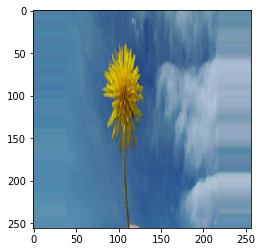

In [39]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
zoom_range=0.5
)
x,y = next(generator.flow_from_directory(path,batch_size = 8,seed =42))
plt.imshow(x[7].astype('uint8'))

In [ ]:
#### شیفت کانال های رنگ

Found 4323 images belonging to 5 classes.


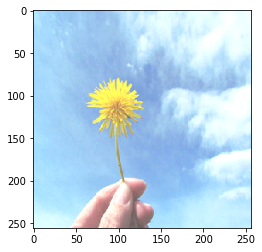

In [43]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
channel_shift_range= 256
)
x,y = next(generator.flow_from_directory(path,batch_size = 8,seed =42))
plt.imshow(x[7].astype('uint8'))

In [55]:
x[2,1:10]

array([[[166., 166., 156.],
        [168., 168., 156.],
        [173., 171., 159.],
        ...,
        [189., 201., 197.],
        [190., 202., 198.],
        [191., 203., 199.]],

       [[166., 163., 154.],
        [169., 167., 155.],
        [172., 170., 158.],
        ...,
        [188., 200., 196.],
        [189., 201., 199.],
        [190., 202., 200.]],

       [[165., 162., 153.],
        [167., 165., 153.],
        [171., 169., 157.],
        ...,
        [186., 198., 198.],
        [186., 198., 198.],
        [187., 199., 199.]],

       ...,

       [[161., 158., 149.],
        [163., 161., 149.],
        [165., 163., 151.],
        ...,
        [181., 190., 197.],
        [180., 189., 196.],
        [180., 189., 194.]],

       [[157., 155., 143.],
        [158., 156., 144.],
        [157., 157., 145.],
        ...,
        [179., 187., 198.],
        [179., 188., 197.],
        [179., 188., 197.]],

       [[157., 155., 143.],
        [158., 156., 144.],
        [157., 1

In [12]:
#### نرمال سازی تصاویر

Found 4323 images belonging to 5 classes.


C:\Users\mcnak\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\mcnak\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


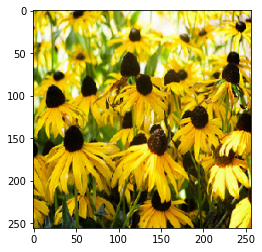

In [68]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization= True
)

x,y = next(generator.flow_from_directory(path,
                                         subset = 'training',
                                         batch_size = 8,
                                         seed =123))
plt.imshow(x[7].astype('uint8'))

In [69]:
x_org.mean(),x.mean()

(124.188835, 124.188835)

#### پیش پردازش دلخواه

Found 4323 images belonging to 5 classes.


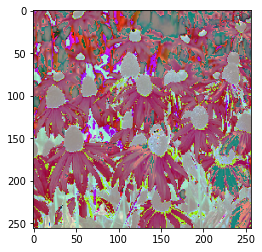

In [76]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
preprocessing_function= tf.keras.applications.resnet50.preprocess_input
)
x,y = next(generator.flow_from_directory(path,
                                         subset = 'training',
                                         batch_size = 8,
                                         seed =123))
plt.imshow(x[7].astype('uint8'))